In [1]:
# Resume–JD Matching using NLP

# ========================
# Imports
# ========================
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import re

In [2]:
# Load text files
# ========================
with open("resume.txt", "r") as f:
    resume_text = f.read()
with open("job_description.txt", "r") as f:
    jd_text = f.read()


In [4]:
# Resume–JD Match Score
# ========================
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform([resume_text, jd_text])

similarity_score = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0] * 100

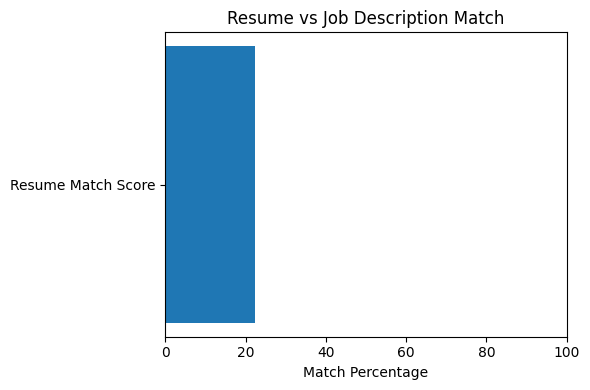

Resume–JD Match Score: 22.47%


In [5]:
# Plot 1: Match Score
plt.figure(figsize=(6,4))
plt.barh(["Resume Match Score"], [similarity_score])
plt.xlim(0, 100)
plt.xlabel("Match Percentage")
plt.title("Resume vs Job Description Match")
plt.tight_layout()
plt.show()

print(f"Resume–JD Match Score: {similarity_score:.2f}%")

In [6]:
# 2️⃣ Skill Match vs Missing Skills
# ========================
def extract_keywords(text):
    text = text.lower()
    words = re.findall(r'\b[a-zA-Z]+\b', text)
    keywords = [
        w for w in words
        if w not in ENGLISH_STOP_WORDS and len(w) > 2
    ]
    return set(keywords)

resume_keywords = extract_keywords(resume_text)
jd_keywords = extract_keywords(jd_text)

matched_skills = sorted(resume_keywords.intersection(jd_keywords))
missing_skills = sorted(jd_keywords - resume_keywords)


In [7]:
# Limit number of skills for clean visualization
matched_display = matched_skills[:5]
missing_display = missing_skills[:5]

skills = matched_display + missing_display
values = [1] * len(skills)

colors = (["green"] * len(matched_display)) + (["red"] * len(missing_display))

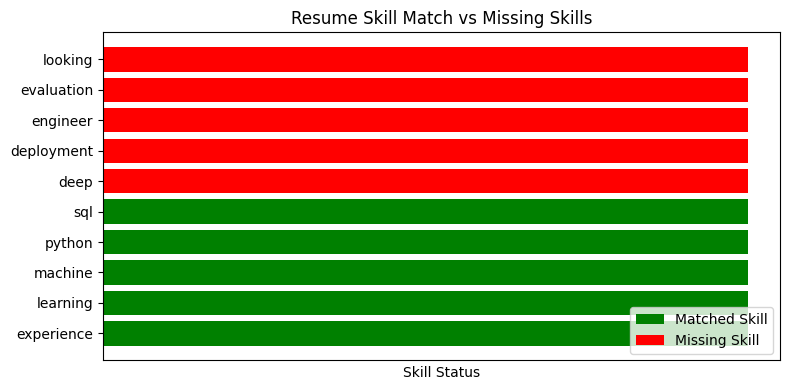

Matched Skills: ['experience', 'learning', 'machine', 'python', 'sql']
Missing Skills: ['deep', 'deployment', 'engineer', 'evaluation', 'looking', 'model', 'nlp']


In [10]:
# Plot
plt.figure(figsize=(8,4))
bars = plt.barh(skills, values, color=colors)
# Legend (explicit meaning of colors)
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', label='Matched Skill'),
    Patch(facecolor='red', label='Missing Skill')
]
plt.legend(handles=legend_elements, loc='lower right')

plt.xlabel("Skill Status")
plt.title("Resume Skill Match vs Missing Skills")
plt.xticks([])  # cleaner look
plt.tight_layout()
plt.show()

print("Matched Skills:", matched_skills)
print("Missing Skills:", missing_skills)
